## Aim 1 - Recreate Figure 2 from Alleman et al

Figure 2 from [Alleman et al](pmc.ncbi.nlm.nih.gov/articles/PMC8686835/) shows experimental vs predicted growth rate of _Azobacter vinelandii_ under different oxygen concentrations and sucrose uptake rates. Panel a shows the predicted rates when using the partially-coupled branch of the electron transport system for ATPM flux determination, and panel b shows the rates under the fully-coupled branch.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import cobra

In [6]:
# load data (downloaded from Alleman et al)
table_s2 = pd.read_excel('./data/alleman_table_s2.xlsx', index_col=0)
original_model = cobra.io.load_json_model('./data/iAA1300_C.json')
model = original_model.copy()

In [7]:
# view data format
table_s2.head()

,Sucrose_uptake_gcdw,O2_conc,ATPM_pred,ETS_path,Growth_rate_exp,Growth_rate_pred,Oxygen_consumption_pred,ATP_production,ATPM_ATP_prect,growth_yeild_suc_pred,growth_yeild_suc_exp,growth_yeild_o2_pred,growth_yeild_o2_exp
0,2.01,12,16.258129,NII_BD_F,0.06,0.094395,19.432741,39.352471,0.413141,46.962927,29.850746,4.857549,3.087573
1,2.24,12,16.258129,NII_BD_F,0.07,0.112532,21.292168,43.321077,0.375294,50.237446,31.250000,5.285130,3.287594
2,2.24,12,16.258129,NII_BD_F,0.10,0.112532,21.292168,43.321077,0.375294,50.237446,44.642857,5.285130,4.696563
3,2.40,12,16.258129,NII_BD_F,0.12,0.125149,22.585683,45.671348,0.355981,52.145209,50.000000,5.541055,5.313100
4,3.79,12,16.258129,NII_BD_F,0.18,0.234755,33.823092,69.296014,0.234619,61.940741,47.493404,6.940684,5.321808


In [8]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.004845,0,0.00%
cl_e,EX_cl_e,0.004845,0,0.00%
cobalt2_e,EX_cobalt2_e,2.327E-05,0,0.00%
cu2_e,EX_cu2_e,0.00066,0,0.00%
fe2_e,EX_fe2_e,0.007682,0,0.00%
fe3_e,EX_fe3_e,0.007268,0,0.00%
glc__D_e,EX_glc__D_e,15,6,100.00%
h_e,EX_h_e,1.161,0,0.00%
k_e,EX_k_e,0.1817,0,0.00%
mg2_e,EX_mg2_e,0.008075,0,0.00%


### Data Processing
Extracting only the experimental data we care about from the provided table, as we want to make the predictions with the model ourselves.

In [29]:
exp_data = table_s2[['Growth_rate_exp', 'O2_conc', 'ATPM_pred', 'ETS_path']].copy()

In [30]:
exp_data['Pathway'] = exp_data['ETS_path'].map(lambda p: 'partially coupled' if p.startswith('NII') else 'fully coupled')

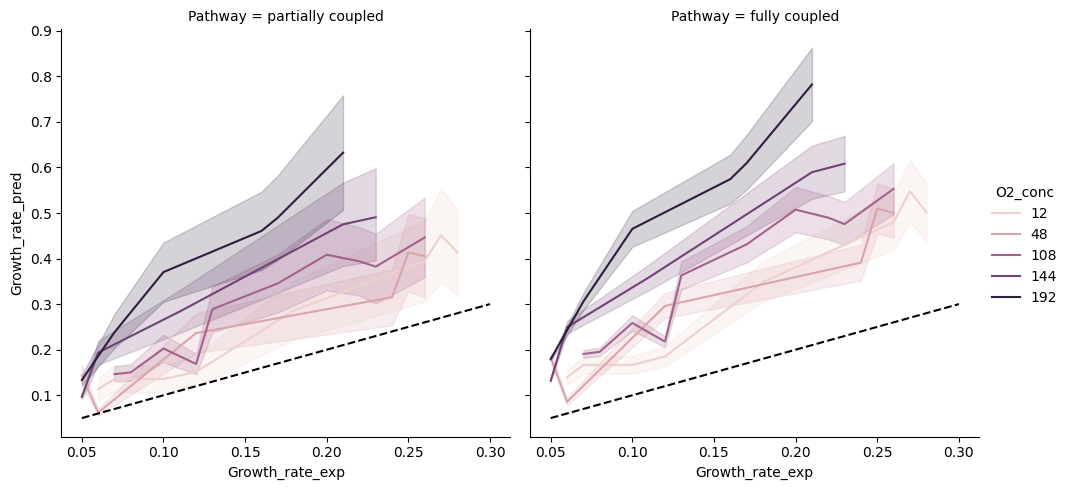

In [42]:
fig = sns.relplot(exp_data, x = 'Growth_rate_exp', y = table_s2['Growth_rate_pred'], hue = 'O2_conc', col = 'Pathway', kind = 'line')
x = np.linspace(0.05, 0.3, 10000)
for ax in fig.axes.flat:
  ax.plot(x, x, color='black', linestyle='--')